### 이 작업은
- 모델분류성능이 뛰어난 패션mnist.h5 모델이 있다는 가정하에
- 28,28,1 의 패션 이미지 자료가 이미지에 있을때
- 패션mnist에서 예측한 폴더로 자동 분배하는 코드임 (당근마켓에서 자료 올리면 자동으로 그 폴더로 이동하는 기능임)

#### [1] numpy자료를 이미지로 저장하여봄
- 패션 이미지를 준비하기 위하여 이러한 방법을 사용해봄...
- 흑백 28,28,1 의 이미지가 이미 준비되어 있다면 이 작업은 진행하지 않아도 됨

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
import os
os.mkdir('./fashion_img')

In [6]:
'0'.zfill(7), '12'.zfill(7)

('0000000', '0000012')

In [7]:
### fashion_img 폴더에 train_x의 60000장 이미지가 저장됨
import imageio
for cnt,x in enumerate(X_train):
    fileName='fashion_' + str(cnt).zfill(7) + '.jpg'
    imageio.imwrite('./fashion_img/' +  fileName, x)

#### [2]패션mnist 모델을 이용하여서 10개의 카테고리로 이미지를 자동으로 배분하고자함.

In [8]:
from tensorflow.keras.models import load_model
import numpy as np
import os
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt

In [9]:
## 작업할 폴더 제작 (T-shift/top 단어는 폴더명으로 부적합한 -과 / 를 _로 변경함)
class_names = ['T_shirt_top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


os.mkdir('./패션이미지종류별로나눔')

for x in class_names:
    os.mkdir('./패션이미지종류별로나눔/' +  x )


In [10]:
model=load_model('./강사제공models/fashionMNIST_CNN.hdf5') 
model.summary()   
# 모델의 가장 상단에 input 사이즈(모델에 입력된 이미지의 크기)를 별도로 레이어로 넣으면 이미지의 사이즈를 알수 있지만
# 아래의 모델 summary는 가장 상단에 conv2d 레이어로 input_size를 알수 없음
# 그래서 input 사이즈가 있는 레이어로 맨 위를 구성하기도함.
# 모델은 있지만 input_size를 summary로도 알수 없는 경우는

# 첫번째 레이어의 input_shape을 이용해서 작성된 모델의 입력되는 input사이즈를 알수 있음.
print('▶ 모델제작된 input size는==>')
model.layers[0].input_shape

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

(None, 28, 28, 1)

In [ ]:
### 위의 모델 summary의 마지막 dense값의 2개이상이면 softmax함수를 사용한것임.

1/1 [==============================] - 0s 23ms/step


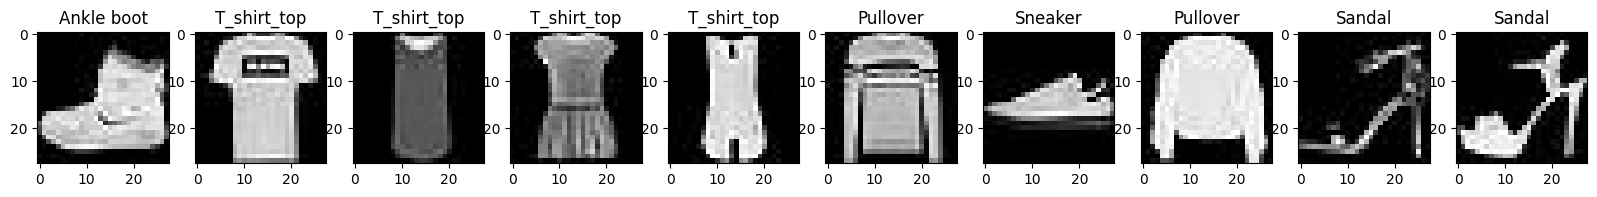

In [11]:
### 샘플로 10개만 확인해봄
imgList=glob('./fashion_img/*.jpg')
plt.figure(figsize=(20,5))
for cnt,x in enumerate(imgList[:10]):
    
    img=Image.open(x).convert('L') #흑백으로 읽음
    img=img.resize((28,28))
    imgArr=np.array(img)/255
    inputimage=imgArr.reshape(1,28,28,1)
    predictNum=model.predict(inputimage)  # 1-1에서 모델제작할때 
    num=np.argmax(predictNum)  #3번값이 제일큼
    
    plt.subplot(1,10,cnt+1)
    plt.imshow(imgArr, cmap='gray')
    plt.title(class_names[num])
    
plt.show()
    

#### [3] 최종:
- 위의 자료를 보면 결과가 잘 나오고 있음
- 위의 예측한 폴더로 저장하려함

In [13]:
import shutil
model=load_model('./강사제공models//fashionMNIST_CNN.hdf5') 
imgList=glob('./fashion_img/*.jpg')

for x in imgList:
    
    img=Image.open(x).convert('L') #흑백으로 읽음
    img=img.resize((28,28))
    imgArr=np.array(img)/255
    inputimage=imgArr.reshape(1,28,28,1)
    predictNum=model.predict(inputimage)  # 1-1에서 모델제작할때 
    num=np.argmax(predictNum)  #3번값이 제일큼
    
    imgName=x.split('\\')[-1]
    sourceFileName='./fashion_img/' + imgName
    targetFileName='./패션이미지종류별로나눔/' + class_names[num] + '/' + imgName
    shutil.move(sourceFileName,targetFileName)

1/1 [==============================] - 0s 26ms/step


KeyboardInterrupt: 